In [ ]:
import gdown

url = 'https://drive.google.com/file/d/1xkn87SRvjp9J7CVpp0y36vTOzRhRz_SE/view?usp=drive_link'

file_id = url.split('/')[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id)
print("Downloaded Data")

1xkn87SRvjp9J7CVpp0y36vTOzRhRz_SE


Downloading...
From: https://drive.google.com/uc?/export=download&id=1xkn87SRvjp9J7CVpp0y36vTOzRhRz_SE
To: /content/Construction Site Safety.v27-yolov8s.yolov5pytorch.zip
100%|██████████| 157M/157M [00:04<00:00, 35.3MB/s]

Downloaded Data


In [ ]:
!mkdir '/content/data'
!unzip '/content/Construction Site Safety.v27-yolov8s.yolov5pytorch.zip' -d '/content/data'
!rm -rf '/content/Construction Site Safety.v27-yolov8s.yolov5pytorch.zip'

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 6.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 102MB/s]


In [ ]:
model.train(data='/content/data/data.yaml',
            task='detect',
            imgsz=640,
            epochs=30,
            batch=32,
            mode='train',
            name='yolov8n_v1_train',
            classes=[0,5,7])

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/data.yaml, epochs=30, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=[0, 5, 7], retina_masks=False, boxes=True, format=torchscript, kera

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 5, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff52b75feb0>
fitness: 0.5398555452656362
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.49051,     0.50827,     0.50827,     0.50827,     0.50827,     0.48242,     0.50827,     0.55189,     0.50827,     0.50827])
names: {0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat', 3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone', 7: 'Safety Vest', 8: 'machinery', 9: 'vehicle'}
plot: True
results_dict: {'metrics/precision(B)': 0.914991050472009, 'metrics/recall(B)': 0.726699844354191, 'metrics/mAP50(B)': 0.824097159821835, 'metrics/mAP50-95(B)': 0.5082731436482807, 'fitness': 0.5398555452656362}
save_dir: PosixPath('runs/detect/yolov8n_v1_train')
speed: {'preprocess': 3.1214011342901933, 'inference': 2.56350793336

In [ ]:
%load_ext tensorboard


In [ ]:
%tensorboard --logdir 'runs/detect/yolov8n_v1_train'

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

YoloV8 Performance

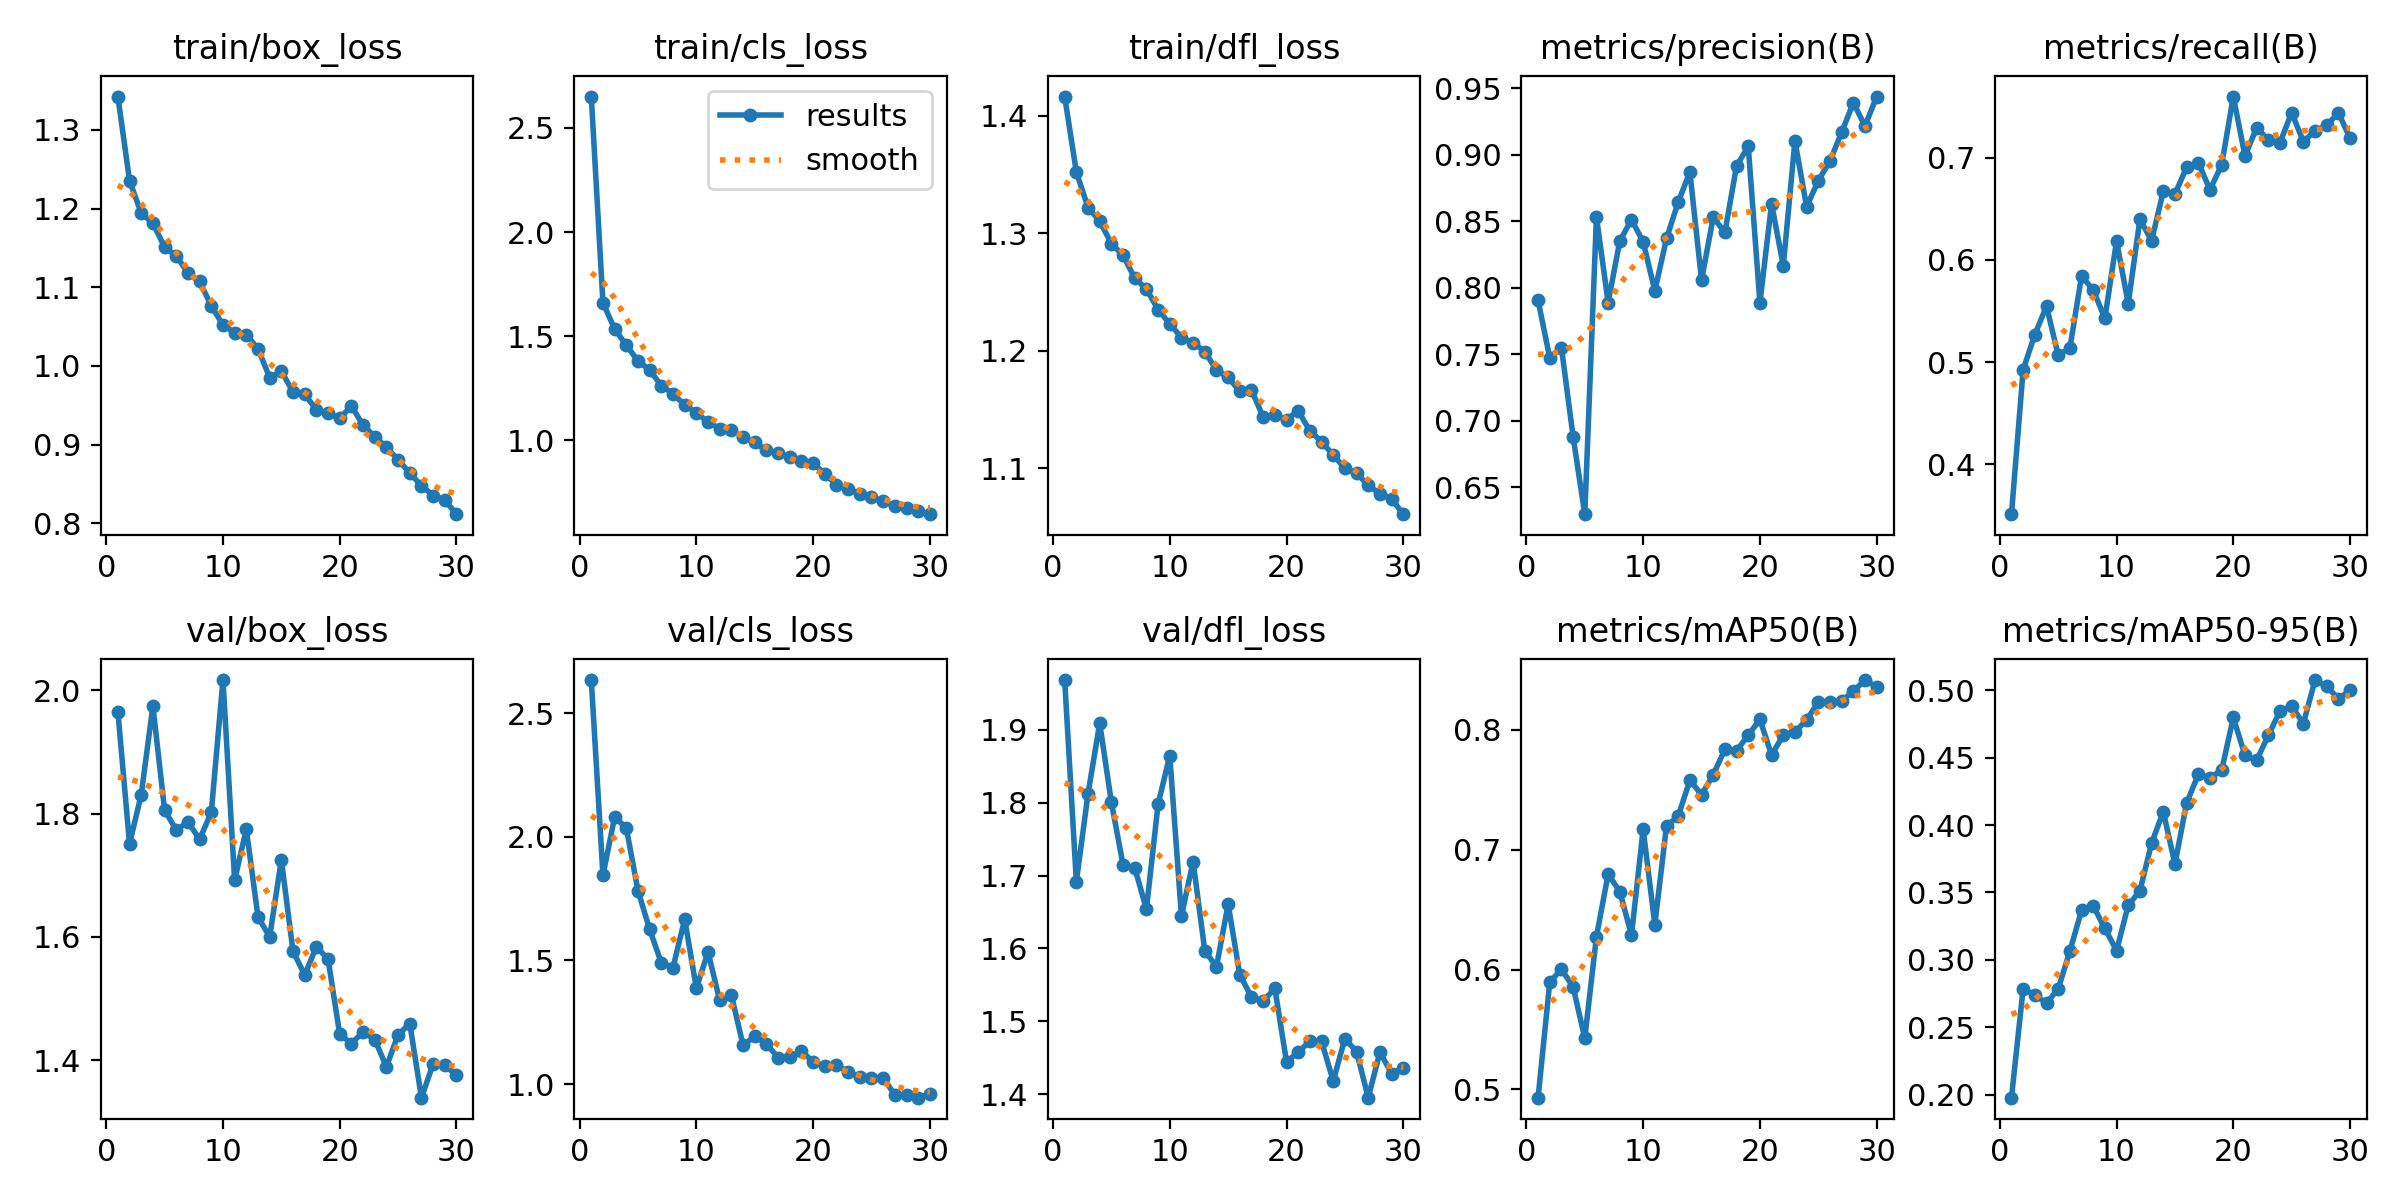

In [ ]:
from PIL import Image
from IPython.display import display

#from utils.plots import plot_results  # plot results.txt as results.png
Image.open('/content/runs/detect/yolov8n_v1_train/results.png')  # view results.png

###Testing Model on test set

In [ ]:
model = YOLO('/content/runs/detect/yolov8n_v1_train/weights/best.pt')

In [ ]:
results = model.predict(source='/content/data/test/images', save=True)

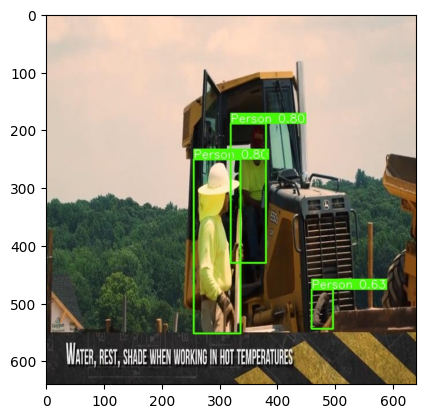

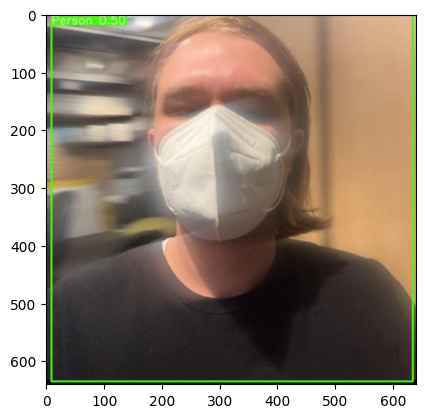

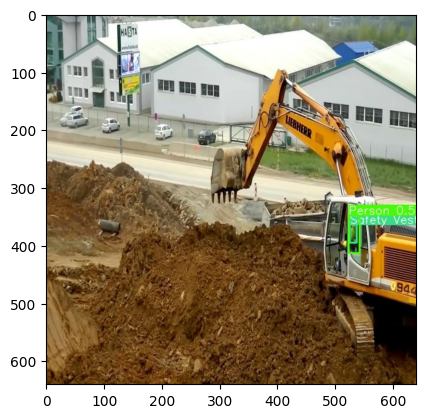

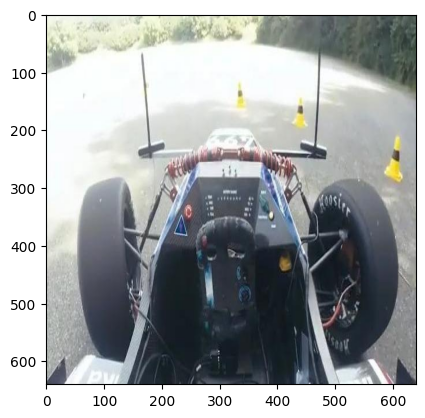

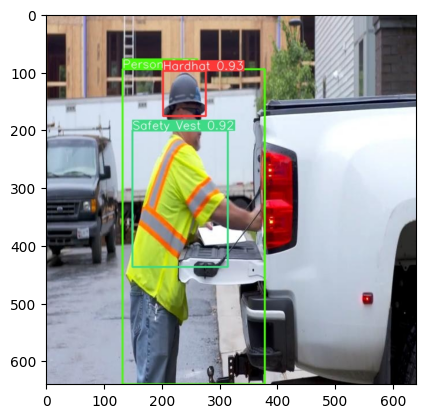

In [ ]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
predictions = glob.glob(os.path.join('/content/runs/detect/predict/','*'))

n = 5 # five random images with predictions
for i in range(n):
    idx = np.random.randint(0,len(predictions))

    image = Image.open(predictions[idx])
    plt.imshow(image)
    plt.show()


In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.make_archive('/content/drive/MyDrive/YoloV8_Run', 'zip', '/content/runs')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/YoloV8_Run.zip'